In [1]:
%matplotlib notebook 
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from scipy import integrate
import glob,sys

from mpl_toolkits.basemap import Basemap, shiftgrid

import MV2 as MV
import cdms2 as cdms
import genutil
import cdutil
import cdtime

sys.path.append("/Users/kmarvel/Google Drive/python-utils")
import Plotting


def bmap(X,projection="moll",**kwargs):
    """ quick plot of data on a lat,lon grid """
   # lon = X.getLongitude()[:]
    #lat = X.getLatitude()[:]
    
    lon = X.getLongitude().getBounds()[:,0]
    lat = X.getLatitude().getBounds()[:,0]
    vmin=None
    vmax=None
    if "vmin" in kwargs.keys():
        vmin=kwargs.pop("vmin")
    if "vmax" in kwargs.keys():
        vmax=kwargs.pop("vmax")
    if not ("lon_0" in list(kwargs.keys())):
        lon_0=np.median(lon)
    else:
        lon_0=kwargs.pop("lon_0")
        X,lon = shiftgrid(180,X,lon,start=False)
    m = Basemap(lon_0=lon_0,projection=projection,**kwargs)
    
        
    x,y=m(*np.meshgrid(lon,lat))
    #if vmin is None:
    #m.pcolormesh(x,y,X,**kwargs)
    #else:
    m.pcolor(x,y,X,vmin=vmin,vmax=vmax)
    return m

surface = {"hfls": "Surface Upward Latent Heat Flux",\
            "hfss": "Surface Upward Sensible Heat Flux",\
            "rlds":"Surface Downwelling Longwave Radiation",\
            "rlus":"Surface Upwelling Longwave Radiation",\
            "rsds":"Surface Downwelling Shortwave Radiation",\
            "rsus": "Surface Upwelling Shortwave Radiation"}
TOA = {"rsdt":"TOA Incident Shortwave Radiation",\
       "rsut": "TOA Outgoing Shortwave Radiation",\
       "rlut": "TOA Outgoing Longwave Radiation"}

In [2]:
datadirec="/Users/kmarvel/Documents/DATA/dansgaard/RUNS/"
piCfile='/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3anl_00PI.nc'
LGMfile= '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3rfanl_21kl.nc'
FullLGMfile= '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1969.aijW3anl_21kl.nc'

In [3]:
fLGM=cdms.open(LGMfile)
TOA_LGM=fLGM("net_rad_planet")
tsurf_LGM=fLGM("tsurf")

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/cdms2/axis.py:1685: UserWarning: 
Your first bounds[0,0] -180.000000000000000 will be corrected to -180.000000000000000
Your bounds bounds[-1,1] 180.000000000000000 will be corrected to 180.000000000000000
  warnings.warn(msg, UserWarning)


In [4]:
fpiC=cdms.open(piCfile)
TOA_piC=fpiC("net_rad_planet")
tsurf_piC=fpiC("tsurf")
delta_TOA=TOA_LGM-TOA_piC
delta_tsurf=tsurf_LGM-tsurf_piC

In [5]:
#Full LGM temperature
ffull=cdms.open(FullLGMfile)
TOA_fullLGM=ffull("net_rad_planet")
tsurf_fullLGM=ffull("tsurf")
delta_tsurf_full=cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/numpy/ma/core.py:3169: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


In [6]:
#Why is there such a large imbalance in the full LGM run?
cdutil.averager(TOA_fullLGM,axis='xy')

variable_57
masked_array(data=0.96452135,
             mask=False,
       fill_value=1e+20)

<IPython.core.display.Javascript object>


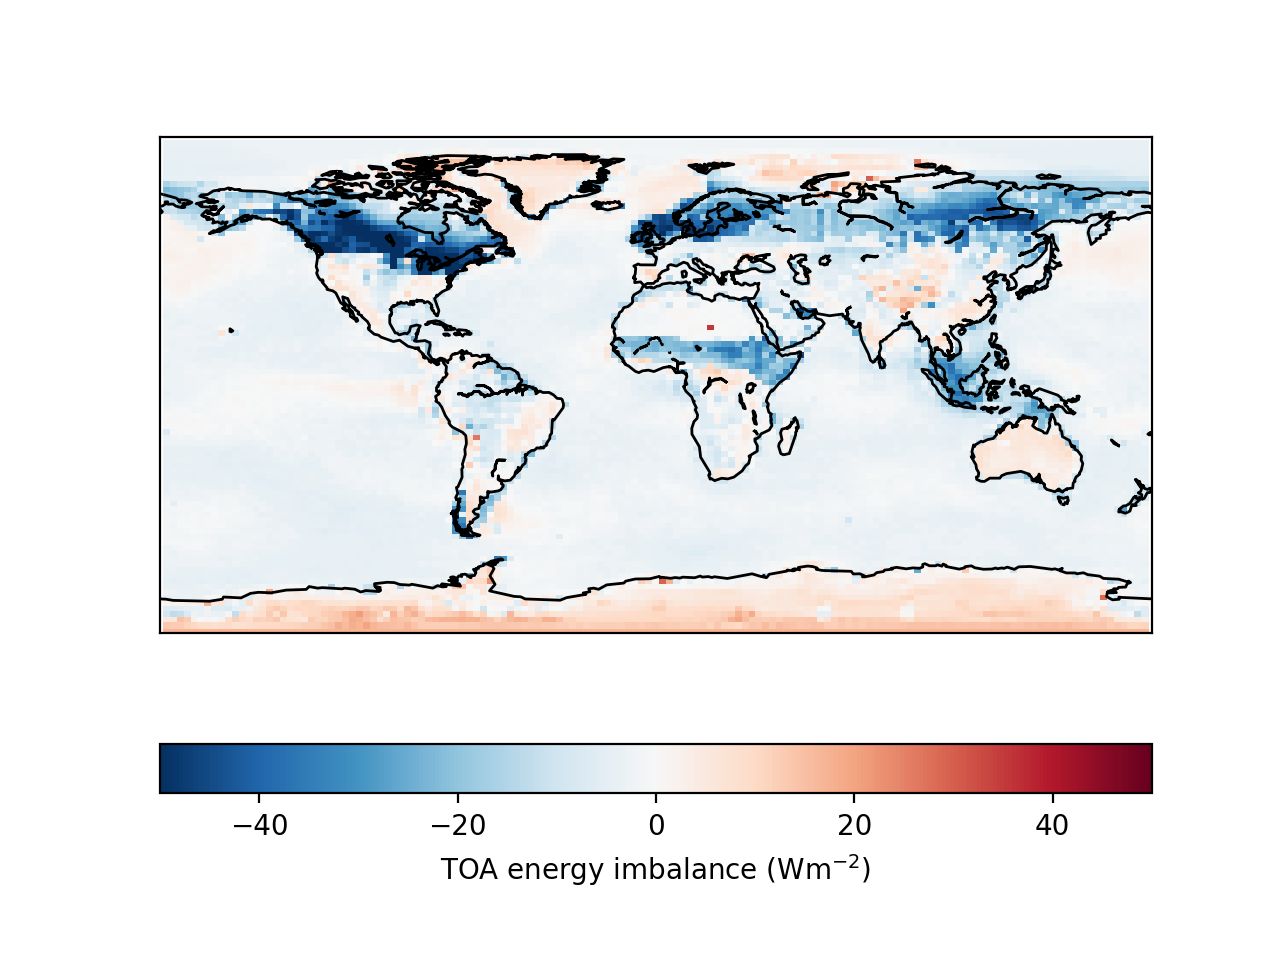

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [7]:
plt.set_cmap(cm.RdBu_r)
m=bmap(TOA_LGM-TOA_piC,vmin=-50,vmax=50,projection="cyl")
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"TOA energy imbalance (Wm$^{-2})$")
plt.savefig("ForGavin/TOA.png")

<IPython.core.display.Javascript object>


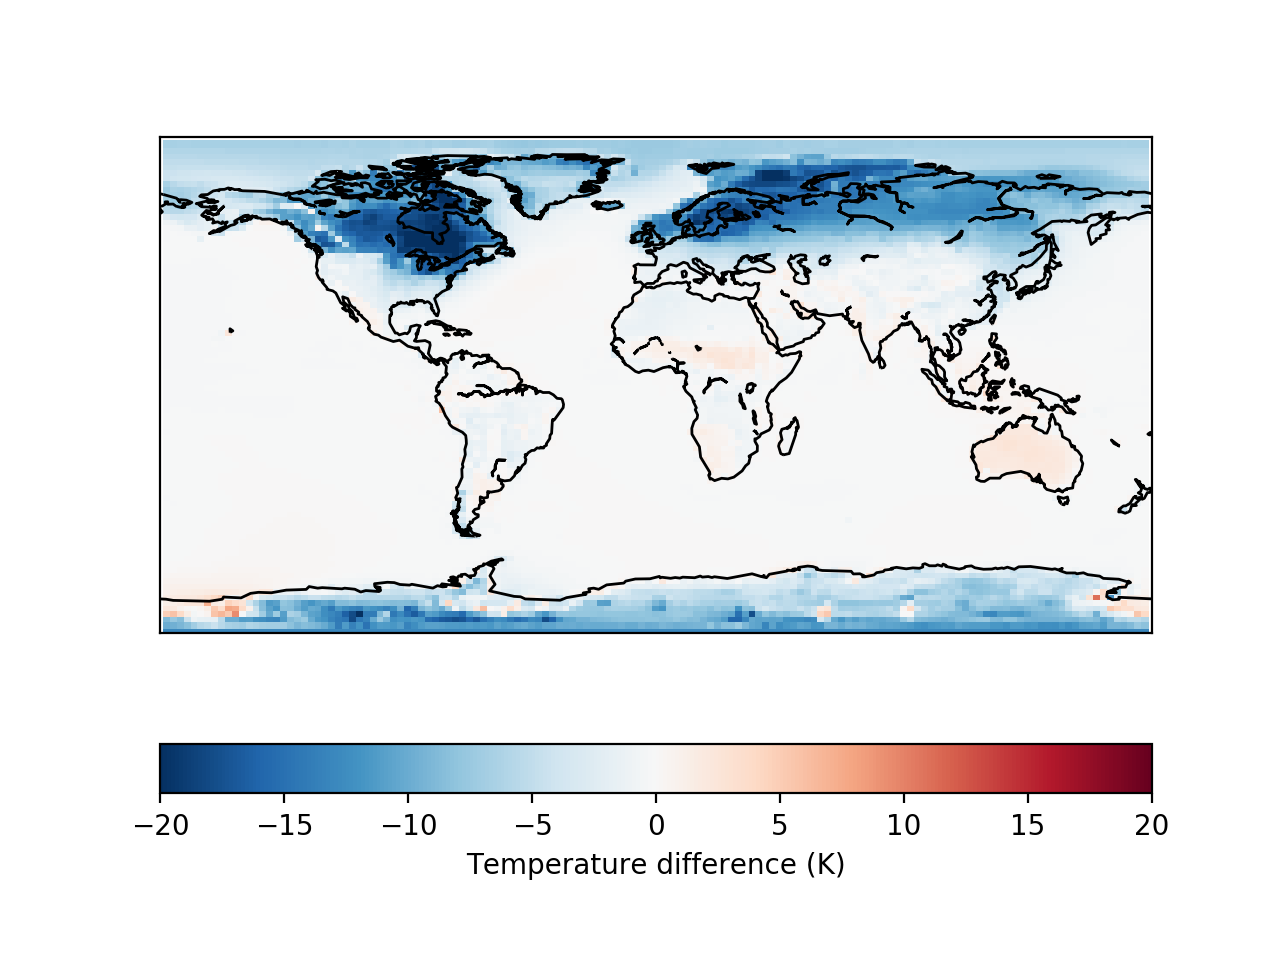

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [8]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_LGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
plt.savefig("ForGavin/Tsurf.png")

<IPython.core.display.Javascript object>


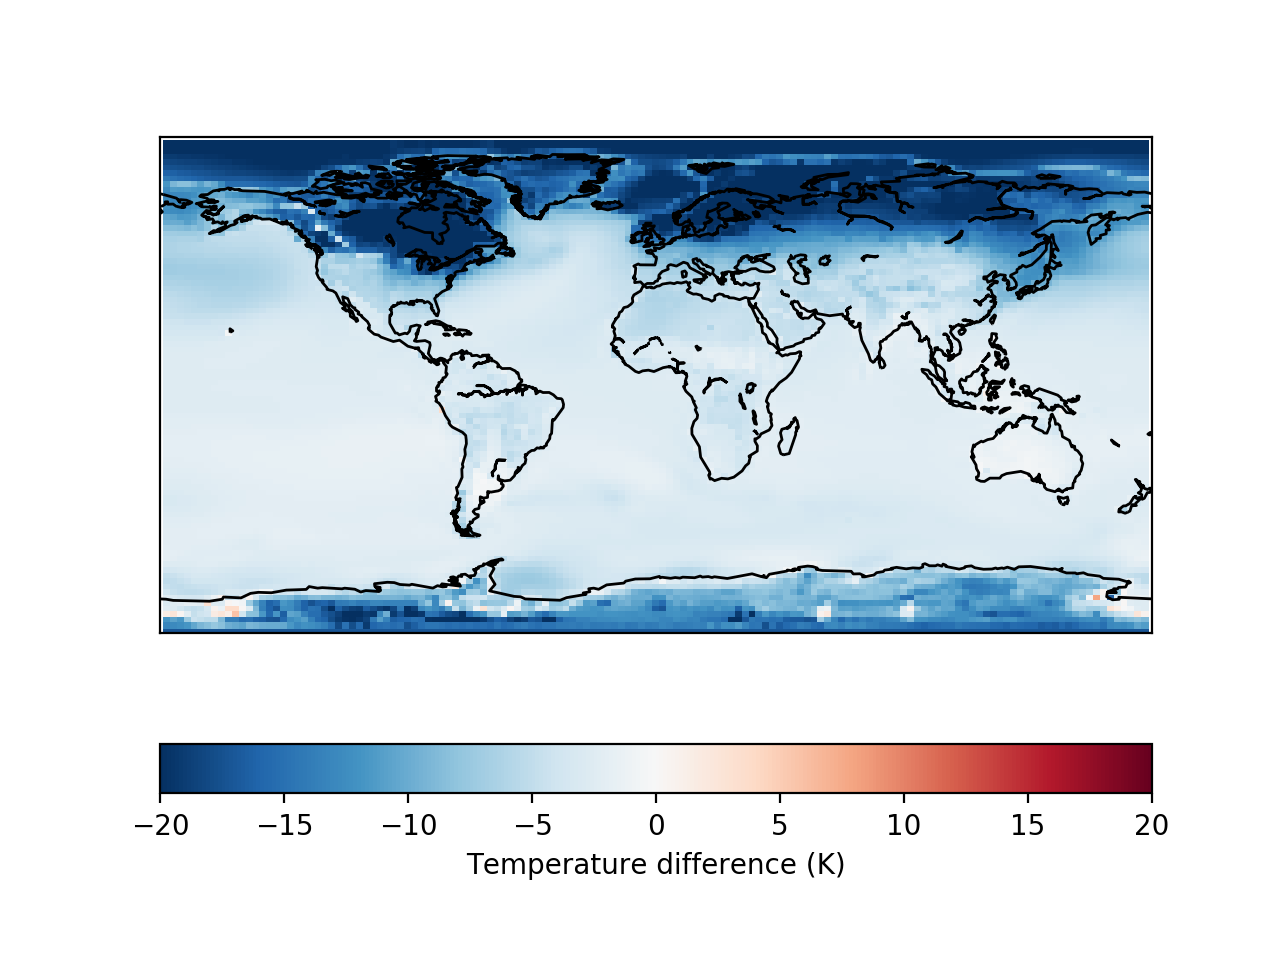

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [9]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(tsurf_fullLGM-tsurf_piC,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Temperature difference (K)")
plt.savefig("ForGavin/Tsurf_full.png")

In [10]:
cdutil.averager(tsurf_fullLGM-tsurf_piC,axis='xy')
cdutil.averager(delta_tsurf,axis='xy')

variable_119
masked_array(data=-1.40804012,
             mask=False,
       fill_value=1e+20)

# Climate sensitivity
Using the q flux values (section 5, https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2013MS000265)

In [11]:
#GISS ECS = 3.1
ECS=2.9
F2x=4.1
lam=F2x/ECS
lam

1.4137931034482758

In [12]:
GISS_ERF=cdutil.averager(delta_TOA,axis='xy')+float(cdutil.averager(delta_tsurf,axis='xy'))*lam
print(GISS_ERF)

-6.701984424098186


In [13]:
lam_LGM=GISS_ERF/delta_tsurf_full

In [14]:
F2x/lam_LGM

3.0455937644694453

In [15]:
sorted(fpiC.variables.keys())

['C_lab',
 'C_lab_hemis',
 'EICB',
 'EICB_hemis',
 'ERVR',
 'ERVRO',
 'ERVRO_hemis',
 'ERVR_hemis',
 'F1LI',
 'F1LI_hemis',
 'FRMP',
 'FRMP_hemis',
 'H2O_from_CH4',
 'H2O_from_CH4_hemis',
 'HWV',
 'HWV_hemis',
 'IWPrad',
 'IWPrad_hemis',
 'L-O_TI',
 'L-O_TI_hemis',
 'LAI',
 'LAI_hemis',
 'LKICEWT',
 'LKICEWT_hemis',
 'LWPrad',
 'LWPrad_hemis',
 'MICB',
 'MICB_hemis',
 'MLTP',
 'MLTP_hemis',
 'MRVR',
 'MRVRO',
 'MRVRO_hemis',
 'MRVR_hemis',
 'PVS',
 'PVS_hemis',
 'RHsurf',
 'RHsurf_hemis',
 'RTSE',
 'RTSE_hemis',
 'SIMSFX',
 'SIMSFX_hemis',
 'SSI1',
 'SSI1_hemis',
 'SSI2',
 'SSI2_hemis',
 'TEMPSI',
 'TEMPSI_hemis',
 'TGO2',
 'TGO2_hemis',
 'TMAXC',
 'TMAXC_hemis',
 'TMAXE',
 'TMAXE_hemis',
 'TMINC',
 'TMINC_hemis',
 'TMNMX',
 'TMNMX_hemis',
 'TOC2',
 'TOC2_hemis',
 'Tatm',
 'Tatm_hemis',
 'Tmsu-TLT',
 'Tmsu-TLT_hemis',
 'Tmsu_TLS',
 'Tmsu_TLS_hemis',
 'Tmsu_TMT',
 'Tmsu_TMT_hemis',
 'Tssu_ch1',
 'Tssu_ch1_hemis',
 'Tssu_ch2',
 'Tssu_ch2_hemis',
 'Tssu_ch3',
 'Tssu_ch3_hemis',
 'ZSI',
 '

In [16]:
delta_low_cloud=fLGM("pcldl")-fpiC("pcldl")
delta_high_cloud=fLGM("pcldh")-fpiC("pcldh")

In [17]:
print(cdutil.averager(delta_low_cloud,axis='xy'))
print(cdutil.averager(delta_high_cloud,axis='xy'))



-0.37229658792427267
-0.49989810727985345


<IPython.core.display.Javascript object>


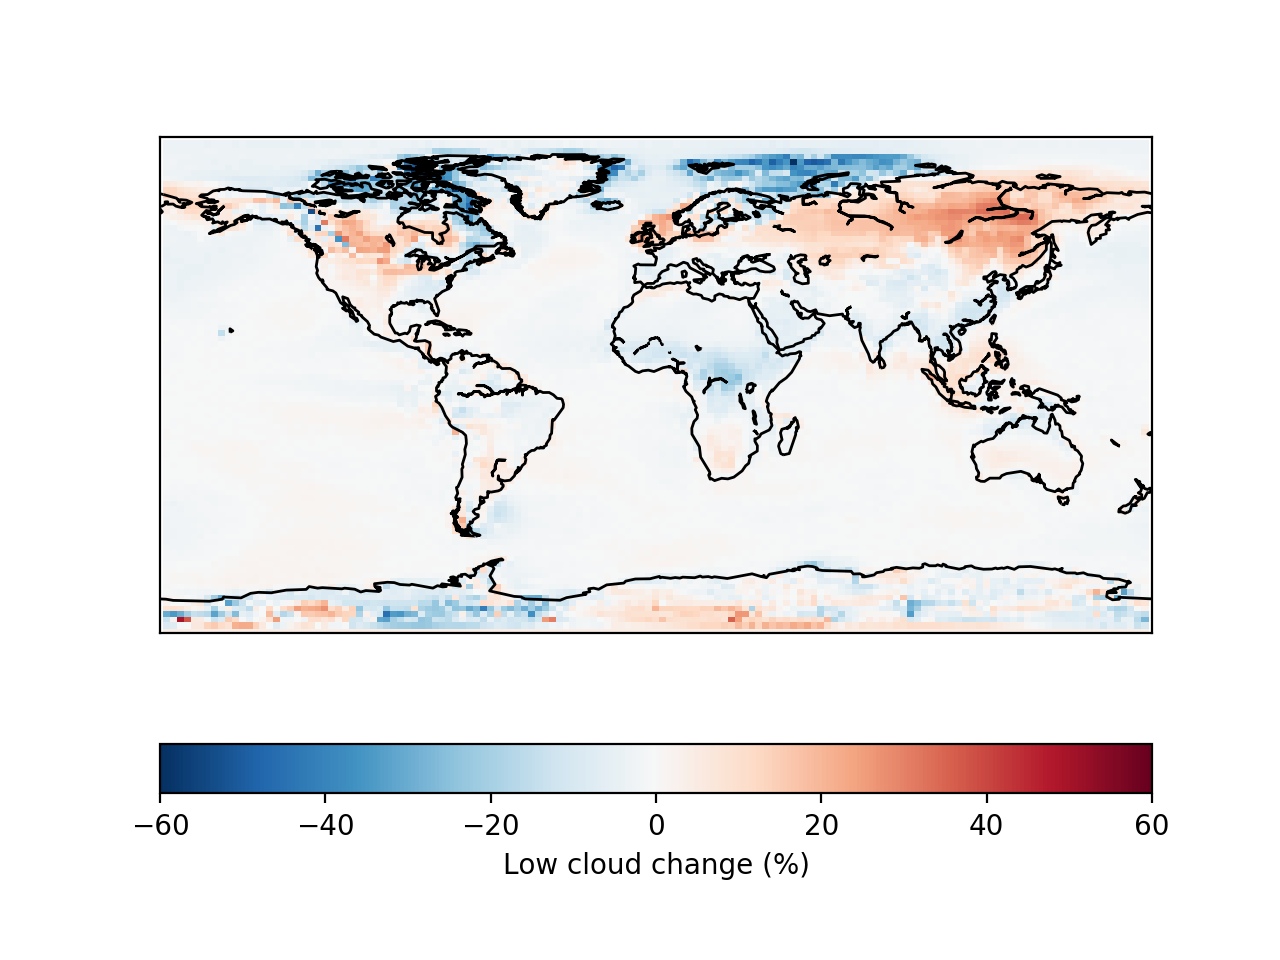

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [18]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_low_cloud,projection="cyl",vmin=-60,vmax=60)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"Low cloud change (%)")
plt.savefig("ForGavin/Lowcloud.png")

<IPython.core.display.Javascript object>


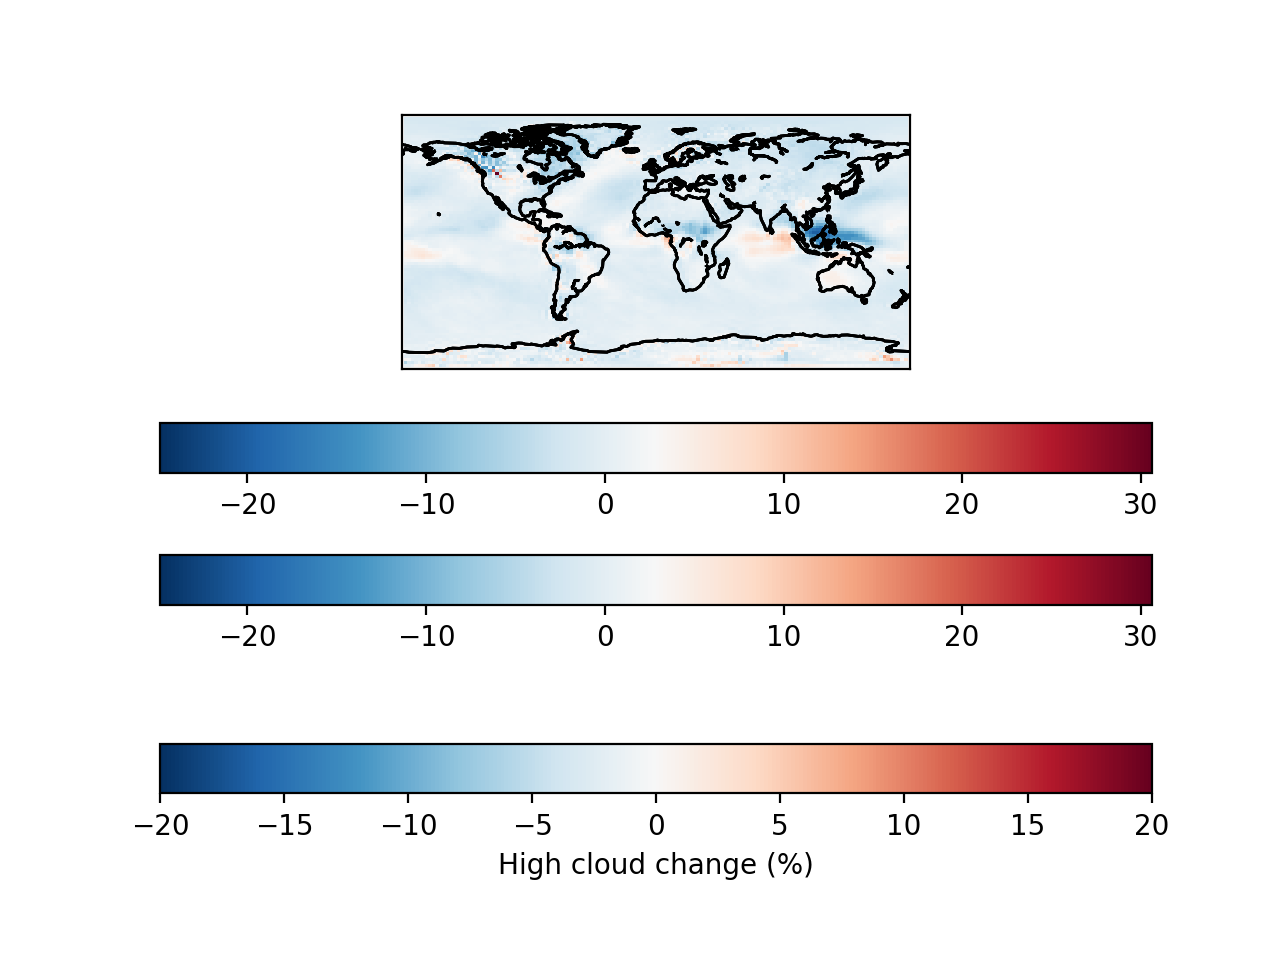

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [19]:
plt.figure()
plt.set_cmap(cm.RdBu_r)
m=bmap(delta_high_cloud,projection="cyl",vmin=-20,vmax=20)
m.drawcoastlines()
plt.colorbar(orientation="horizontal",label=r"High cloud change (%)")
plt.savefig("ForGavin/Highcloud.png")

In [20]:
variables=np.array(sorted(fLGM.variables.keys()))
isccp_vars=np.where([x.find("isccp")>=0 for x in variables])[0]
variables[isccp_vars]

array(['cldtpp_isccp', 'cldtpp_isccp_hemis', 'optd_isccp',
       'optd_isccp_hemis', 'pcldh_isccp', 'pcldh_isccp_hemis',
       'pcldl_isccp', 'pcldl_isccp_hemis', 'pcldm_isccp',
       'pcldm_isccp_hemis', 'pclds_isccp', 'pclds_isccp_hemis',
       'pcldt_isccp', 'pcldt_isccp_hemis'], dtype='<U34')

In [21]:
fLGM

<CDMS file '/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3rfanl_21kl.nc', mode 'r' at 7f8ee0482ee0, status: open>

In [22]:
ftest=cdms.open("/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3rfanl_21kl.nc")
variables=np.array(sorted(ftest.variables.keys()))
isccp_vars=np.where([x.find("isccp")>=0 for x in variables])[0]
variables[isccp_vars]

array(['cldtpp_isccp', 'cldtpp_isccp_hemis', 'optd_isccp',
       'optd_isccp_hemis', 'pcldh_isccp', 'pcldh_isccp_hemis',
       'pcldl_isccp', 'pcldl_isccp_hemis', 'pcldm_isccp',
       'pcldm_isccp_hemis', 'pclds_isccp', 'pclds_isccp_hemis',
       'pcldt_isccp', 'pcldt_isccp_hemis'], dtype='<U34')

In [23]:
files=glob.glob("/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.*W3rfanl_21kl.nc")
for fil in files:
    print("****")
    print(fil)
    ftest=cdms.open(fil)
    variables=np.array(sorted(ftest.variables.keys()))
    isccp_vars=np.where([x.find("isccp")>=0 for x in variables])[0]
    for variable in variables[isccp_vars]:
        print(variable)
        print(ftest[variable].attributes)
    ftest.close()

****
/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.accW3rfanl_21kl.nc
aisccp
{'missing_value': 1e+20, 'reduction': 'sum'}
isccp_late
{'missing_value': 1e+20}
isccp_press
{'missing_value': 999999}
isccp_tau
{'missing_value': 1e+20}
wisccp
{'missing_value': 1e+20, 'reduction': 'sum'}
****
/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.adiurnW3rfanl_21kl.nc
****
/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.agcW3rfanl_21kl.nc
****
/Users/kmarvel/Documents/DATA/dansgaard/RUNS/ANN1950-1979.aijW3rfanl_21kl.nc
cldtpp_isccp
{'missing_value': array([-1.e+30], dtype=float32), 'units': 'mb', 'long_name': 'CLOUD TOP PRESSURE (ISCCP)'}
cldtpp_isccp_hemis
{'missing_value': 1e+20}
optd_isccp
{'missing_value': array([-1.e+30], dtype=float32), 'long_name': 'CLOUD OPTICAL DEPTH (ISCCP)'}
optd_isccp_hemis
{'missing_value': 1e+20}
pcldh_isccp
{'missing_value': array([-1.e+30], dtype=float32), 'units': '%', 'long_name': 'HIGH LEVEL CLOUDINESS (ISCCP)'}
pcldh_isccp_hemis
{

In [43]:
def deltafixedSST(variable,full=False):
    if full:
        LGMvar=ffull(variable)
    else:
        LGMvar=fLGM(variable)
    piCvar=fpiC(variable)
    return LGMvar-piCvar
def plot_delta(variable,full=False,vmin=None,vmax=None):
    plt.figure()
    m=bmap(deltafixedSST(variable,full=full),projection="cyl",vmin=vmin,vmax=vmax)
    m.drawcoastlines()
    plt.colorbar(orientation="horizontal")

<IPython.core.display.Javascript object>


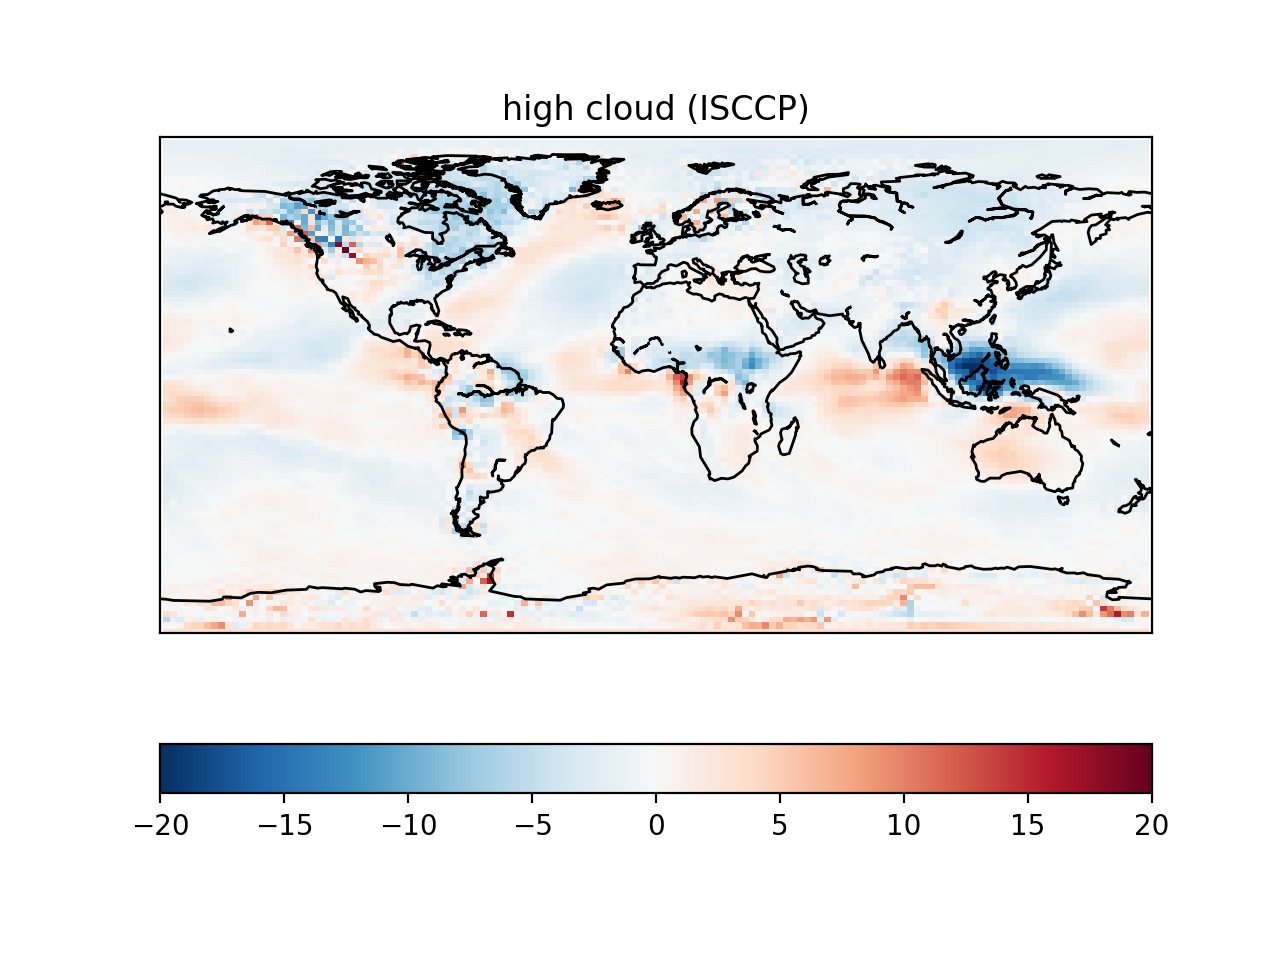

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


<IPython.core.display.Javascript object>


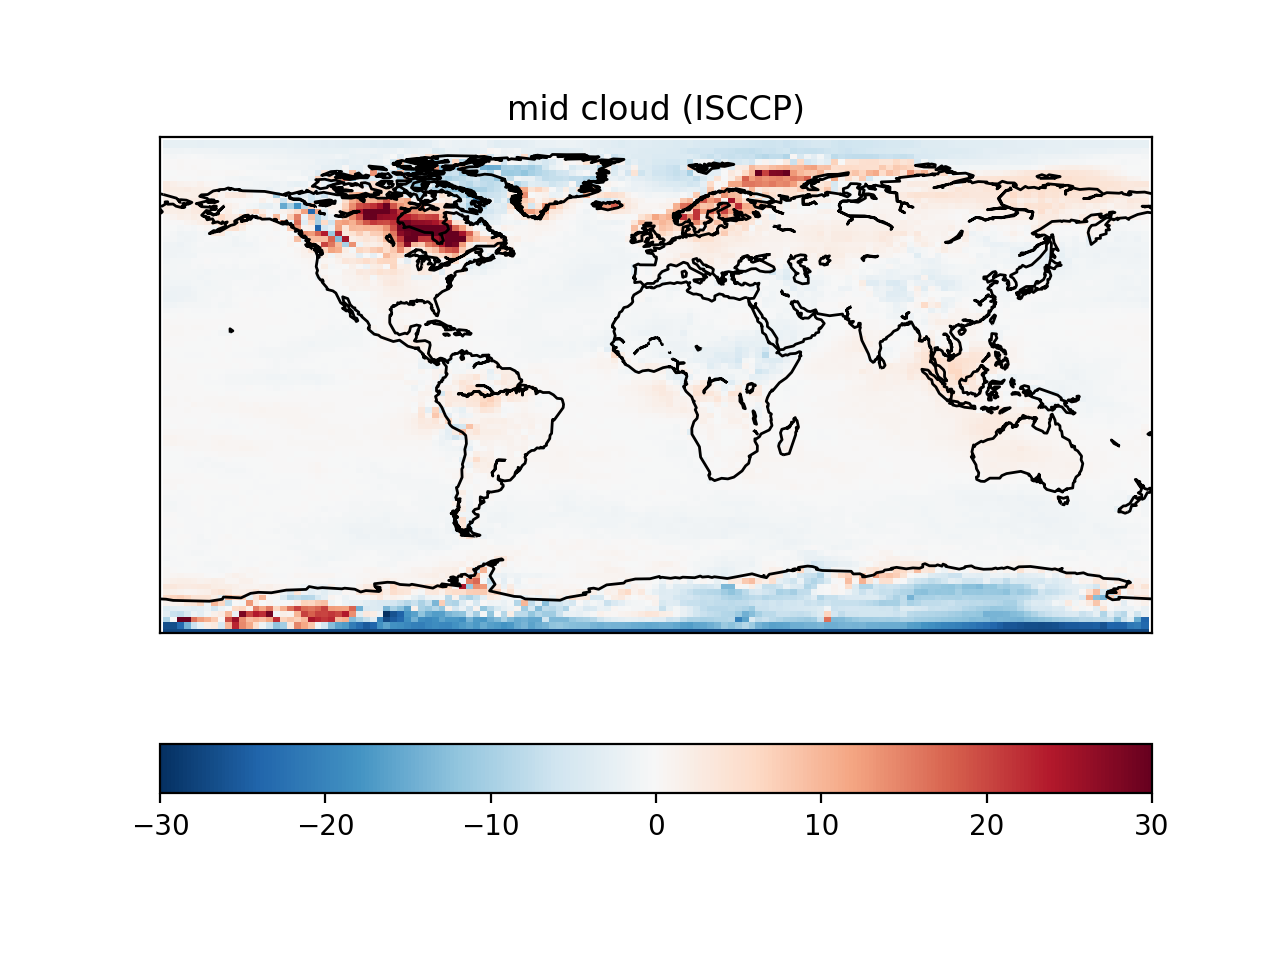

<IPython.core.display.Javascript object>


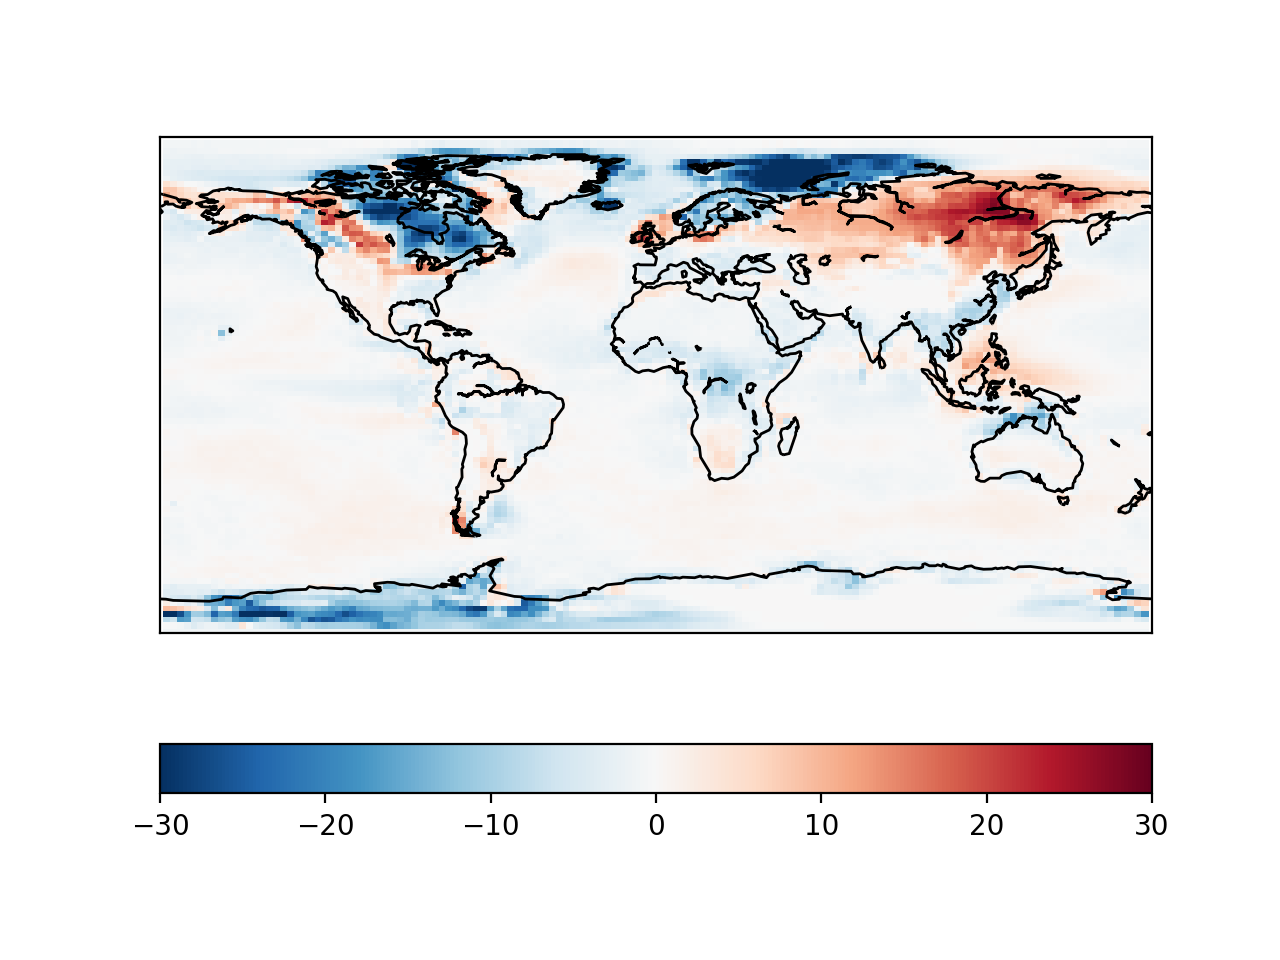

In [34]:
plot_delta("pcldh_isccp",vmin=-20,vmax=20)
plt.title("high cloud (ISCCP)")
plot_delta("pcldm_isccp",vmin=-30,vmax=30)
plt.title("mid cloud (ISCCP)")
plot_delta("pcldl_isccp",vmin=-30,vmax=30)

In [37]:
sorted(fLGM.variables)

['C_lab',
 'C_lab_hemis',
 'EICB',
 'EICB_hemis',
 'ERVR',
 'ERVRO',
 'ERVRO_hemis',
 'ERVR_hemis',
 'F1LI',
 'F1LI_hemis',
 'FRMP',
 'FRMP_hemis',
 'H2O_from_CH4',
 'H2O_from_CH4_hemis',
 'HWV',
 'HWV_hemis',
 'IWPrad',
 'IWPrad_hemis',
 'L-O_TI',
 'L-O_TI_hemis',
 'LAI',
 'LAI_hemis',
 'LKICEWT',
 'LKICEWT_hemis',
 'LWPrad',
 'LWPrad_hemis',
 'MICB',
 'MICB_hemis',
 'MLTP',
 'MLTP_hemis',
 'MRVR',
 'MRVRO',
 'MRVRO_hemis',
 'MRVR_hemis',
 'PVS',
 'PVS_hemis',
 'RHsurf',
 'RHsurf_hemis',
 'RTSE',
 'RTSE_hemis',
 'SIMSFX',
 'SIMSFX_hemis',
 'SSI1',
 'SSI1_hemis',
 'SSI2',
 'SSI2_hemis',
 'TEMPSI',
 'TEMPSI_hemis',
 'TGO2',
 'TGO2_hemis',
 'TMAXC',
 'TMAXC_hemis',
 'TMAXE',
 'TMAXE_hemis',
 'TMINC',
 'TMINC_hemis',
 'TMNMX',
 'TMNMX_hemis',
 'TOC2',
 'TOC2_hemis',
 'Tatm',
 'Tatm_hemis',
 'Tmsu-TLT',
 'Tmsu-TLT_hemis',
 'Tmsu_TLS',
 'Tmsu_TLS_hemis',
 'Tmsu_TMT',
 'Tmsu_TMT_hemis',
 'Tssu_ch1',
 'Tssu_ch1_hemis',
 'Tssu_ch2',
 'Tssu_ch2_hemis',
 'Tssu_ch3',
 'Tssu_ch3_hemis',
 'ZSI',
 '

<IPython.core.display.Javascript object>


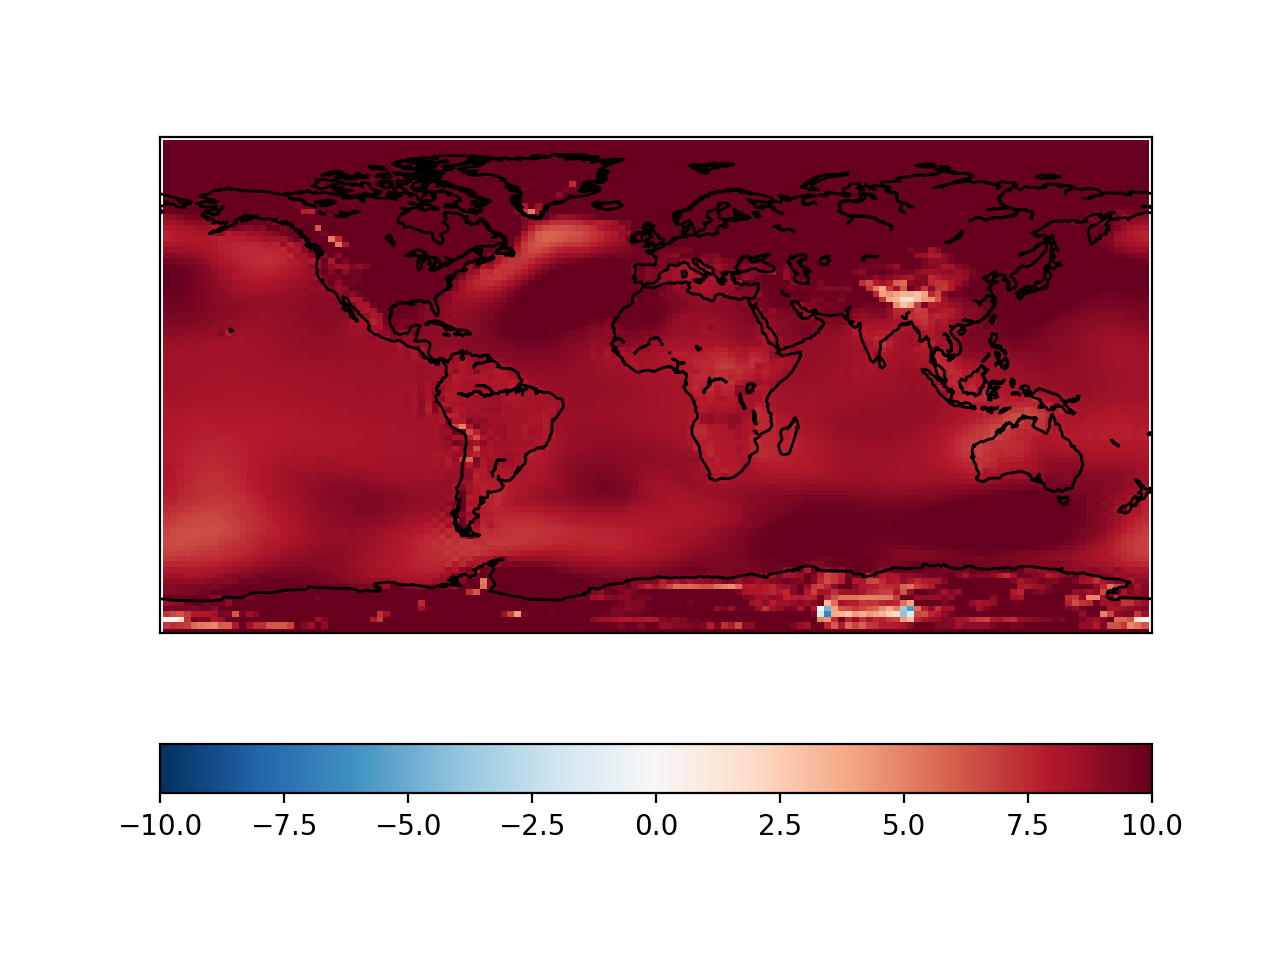

/Users/kmarvel/anaconda3/envs/cdat_plus/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


In [49]:
plot_delta("slp",full=True,vmin=-10,vmax=10)